## Dataset Information


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Import modules

In [3078]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [3079]:
df = pd.read_csv('Bigmart_Sales_Prediction_Analysis.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3080]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [3081]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3082]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3083]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the dataset

In [3084]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [3085]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [3086]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [3087]:
# print the categorical columns
for col in cat_col:
    # print(col)
    print(df[col].value_counts())
    print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



In [3088]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [3089]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

Text(0.5, 1.0, 'Item_Weight Boxplot')

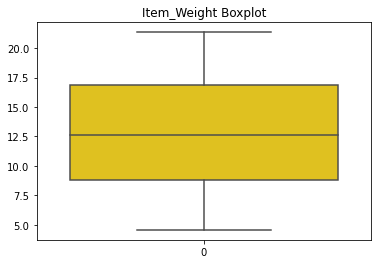

In [3090]:
# Checking for Outliers
sns.boxplot(data=df['Item_Weight'],orient="v", color = 'gold')
plt.title("Item_Weight Boxplot")

In [3091]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [3092]:
df['Item_Weight'].isnull().sum()

0

Text(0.5, 1.0, 'Item_Weight Boxplot')

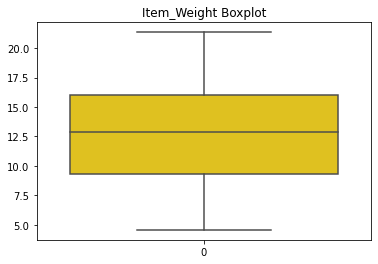

In [3093]:
# Checking for Outliers
sns.boxplot(data=df['Item_Weight'],orient="v", color = 'gold')
plt.title("Item_Weight Boxplot")

In [3094]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [3095]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [3096]:
df['Outlet_Size'].isnull().sum()

0

In [3097]:
sum(df['Item_Visibility']==0)

526

In [3098]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [3099]:
sum(df['Item_Visibility']==0)

0

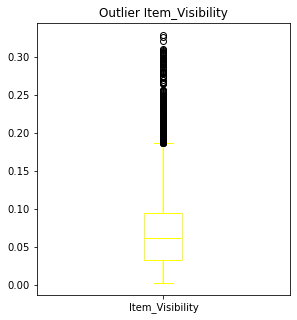

In [3100]:
def remove_outliers_iqr(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    return outliers_removed

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Item_Visibility'].plot(kind='box', color='yellow', vert=True)  #
plt.title('Outlier Item_Visibility')
plt.show()


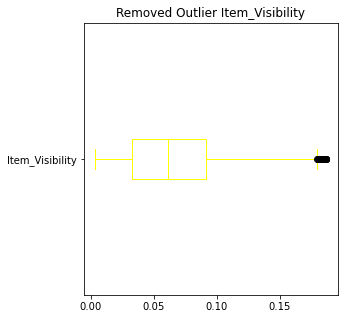

In [3101]:
Item_Visibility_outliers_removed = remove_outliers_iqr(df['Item_Visibility'])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
Item_Visibility_outliers_removed.plot(kind='box', color='yellow', vert=False)
plt.title('Removed Outlier Item_Visibility')
plt.show()

In [3102]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creation of New Attributes

In [3103]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [3104]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [3105]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [3106]:
# create small values for establishment year
#df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [3107]:
#df['Outlet_Years']

In [3108]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


## Exploratory Data Analysis

#### univariate plots

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

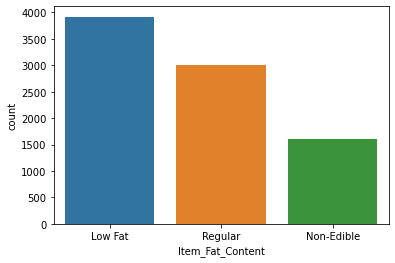

In [3109]:
sns.countplot(df["Item_Fat_Content"])

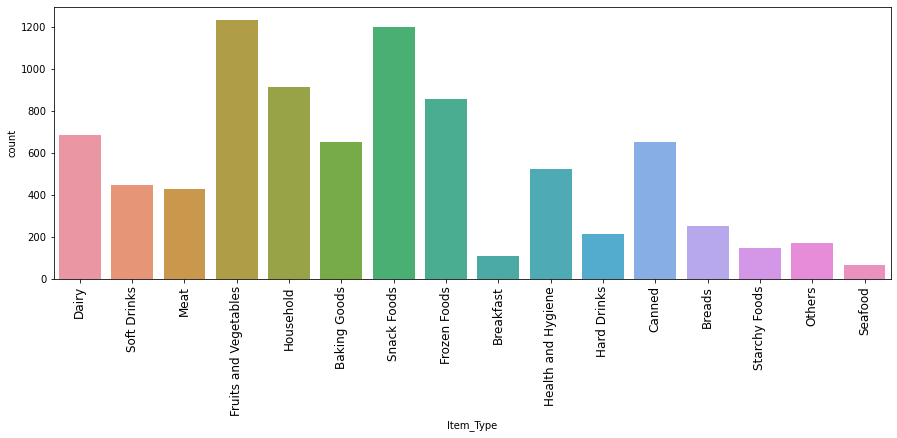

In [3110]:
plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90, fontsize=12) 
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

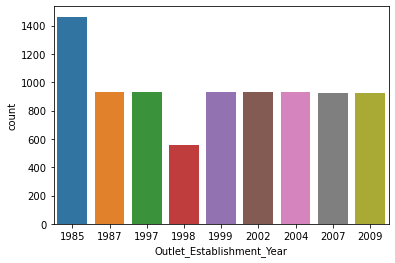

In [3111]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

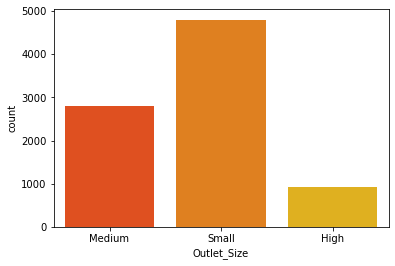

In [3112]:
sns.countplot(df['Outlet_Size'], palette='autumn')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

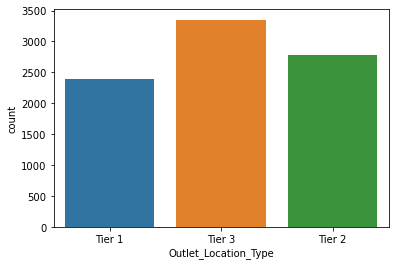

In [3113]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

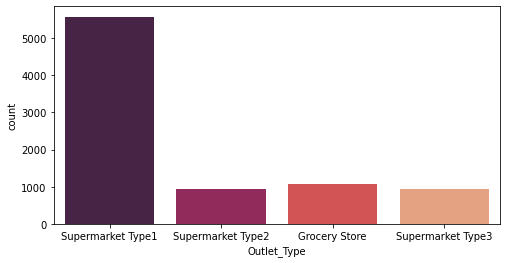

In [3114]:
plt.figure(figsize=(8,4))
sns.countplot(df['Outlet_Type'],palette='rocket')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

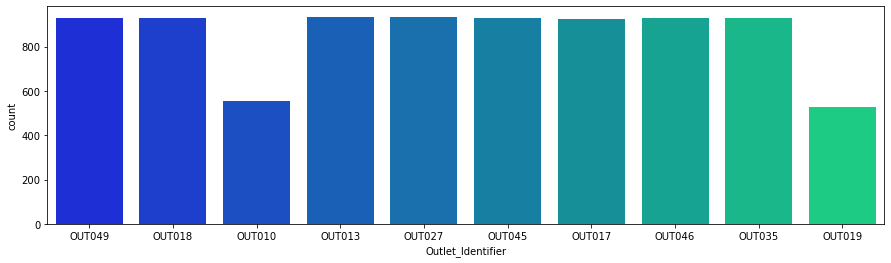

In [3115]:
plt.figure(figsize=(15,4))
sns.countplot(df['Outlet_Identifier'],palette='winter')

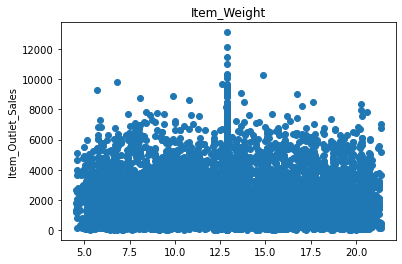

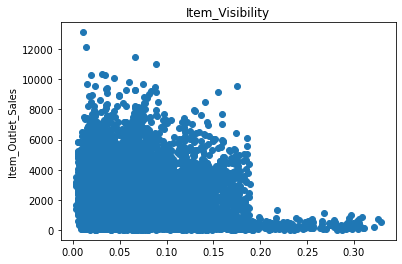

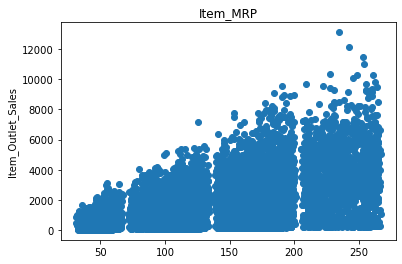

In [3116]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

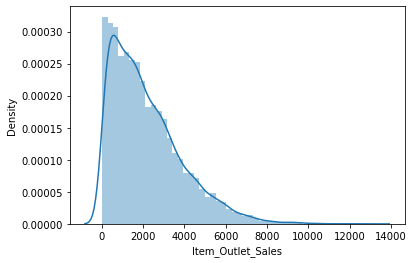

In [3117]:
sns.distplot(df['Item_Outlet_Sales'])

In [3118]:
#from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
#ss = StandardScaler()

# Define the columns to be scaled
#columns_to_scale = ['Item_Outlet_Sales']

# Scale the selected columns
#df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])


In [3119]:
# Log transformation is converting data by applying a logarithm, which helps reduce extreme values' impact and makes skewed data more normal.
df['Item_Outlet_Sales'] = np.log(5+df['Item_Outlet_Sales'])

In [3120]:
# Get the maximum and minimum values of the 'Item_Outlet_Sales' column
#min_value = df['Item_Outlet_Sales'].min()
#max_value = df['Item_Outlet_Sales'].max()

# Perform MinMax scaling
#scaled = (df['Item_Outlet_Sales'] - min_value) / (max_value - min_value)

# Assign scaled values back to the dataframe
#df['Item_Outlet_Sales'] = scaled


In [3121]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Define the columns to be scaled
#columns_to_scale = ['Item_Outlet_Sales']

# Scale the selected columns
#df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

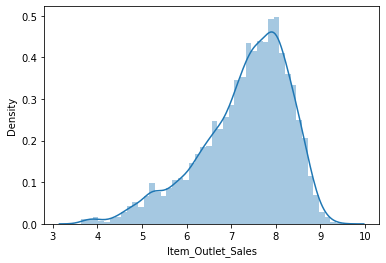

In [3122]:
sns.distplot(df['Item_Outlet_Sales'])

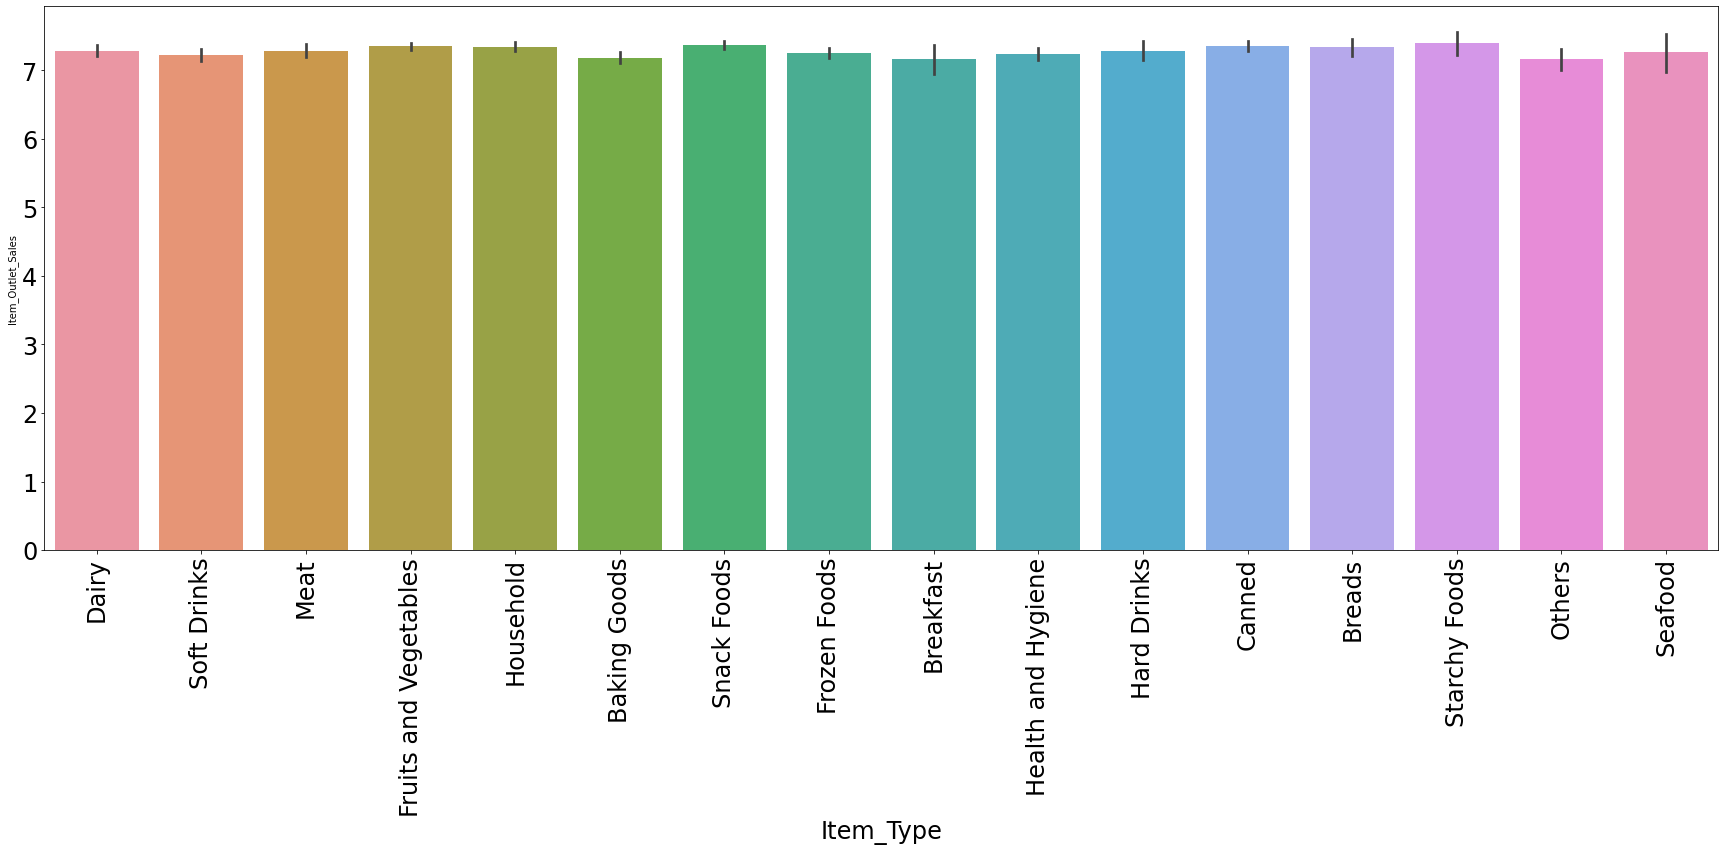

In [3123]:

plt.figure(figsize=(30,10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xlabel('Item_Type', fontsize=24)  
plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=24) 
plt.show()

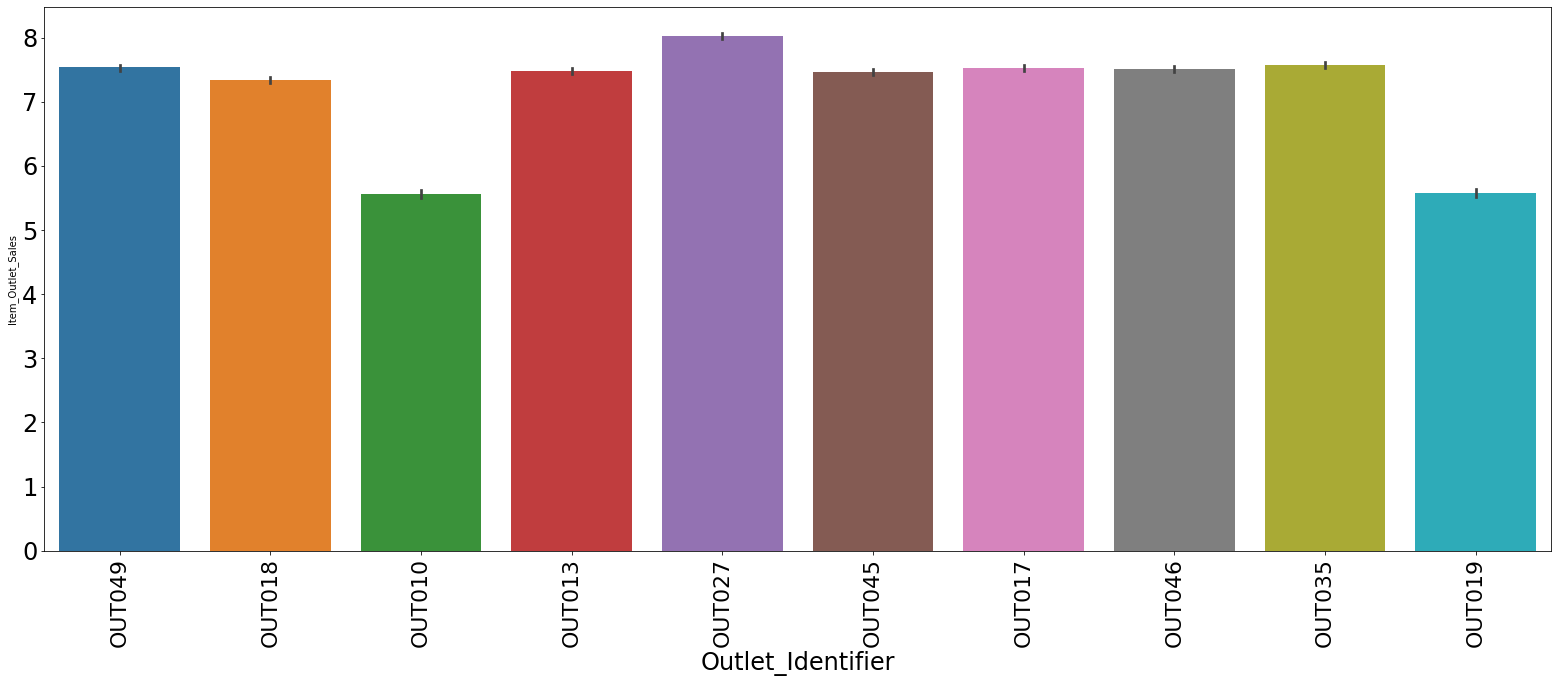

In [3124]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df)
plt.xlabel('Outlet_Identifier', fontsize=24)  
plt.xticks(fontsize=22, rotation=90)
plt.yticks(fontsize=24) 
plt.show()

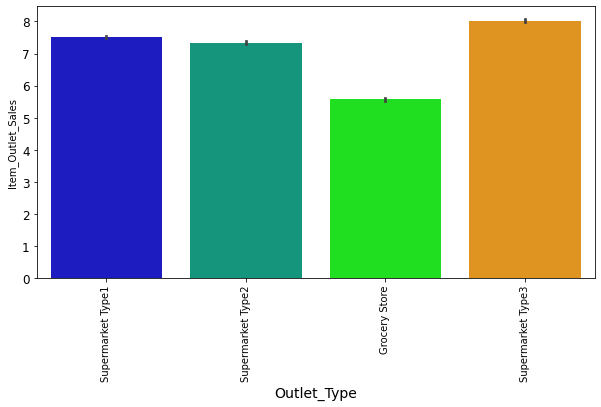

In [3125]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=12) 
plt.show()

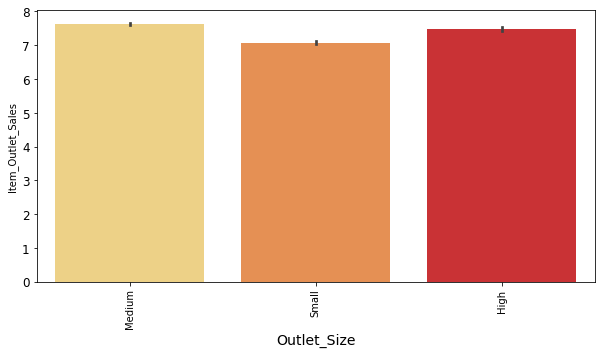

In [3126]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=12) 
plt.show()

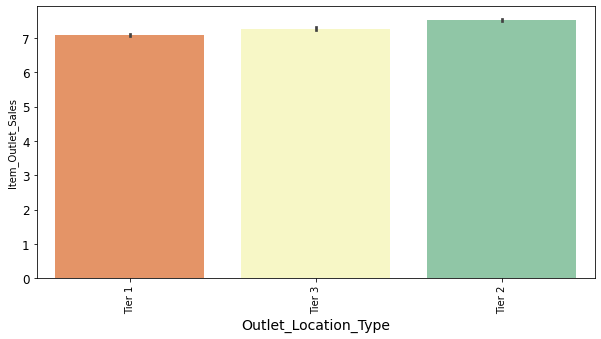

In [3127]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=12) 
plt.show()

## Coorelation Matrix



<AxesSubplot:>

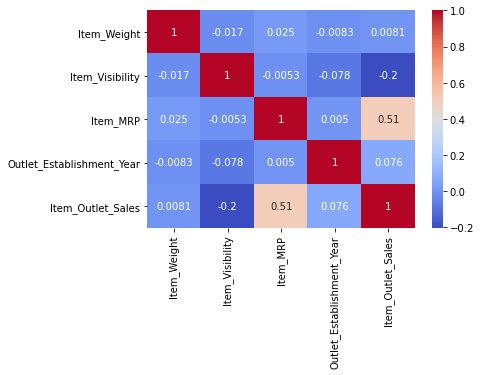

In [3128]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [3129]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.226878,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.105737,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.650773,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.603103,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.907460,Non-Consumable


## Label Encoding

In [3130]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Define categorical columns
cat_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Identifier', 'Item_Type', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type', 'Item_Identifier']

# Encode categorical columns using LabelEncoder
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [3131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   int64  
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   int64  
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   int64  
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 

## Onehot Encoding

In [3132]:

#cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']

#df = pd.get_dummies(df, columns=cat_col)

df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,156,284,0,663,4,5592,9,1999,1,0,1,8.226878,1
1,8,57,2,879,14,473,3,2009,1,2,2,6.105737,0
2,662,496,0,714,10,2901,9,1999,1,0,1,7.650773,1
3,1121,513,2,4432,6,4227,0,1998,2,2,0,6.603103,1
4,1297,265,1,4432,9,627,1,1987,0,2,1,6.907460,2


In [3133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   int64  
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   int64  
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   int64  
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Item_Type              8523 non-null   int32  
dtypes: float64(1), int32(8), int64(4)
memory usage: 

## Input Split

In [3134]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [3135]:
X.shape

(8523, 9)

In [3136]:
y.shape

(8523,)

## Train Test Split

In [3137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((6818, 9), (1705, 9))

## Model Training

In [3138]:
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the training set
pred = model.predict(X_test)

In [3163]:
print("Score:", model.score(X_test, y_test))
print("MSE:",mean_squared_error(y_test, pred))

Score: 0.5462955869935193
MSE: 0.4699109052789872


Text(0.5, 1.0, 'Linear Regression ')

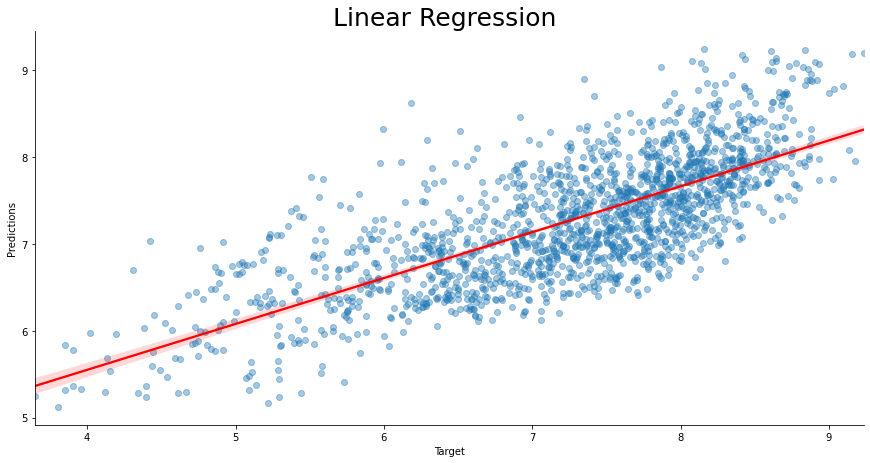

In [3140]:
model=pd.DataFrame()
model['Target']=y_test
model['Predictions']=pred

sns.lmplot('Target','Predictions',data=model,height=6,aspect=2,line_kws={'color':'red'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression ',size=25)

In [3141]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,156,284,0,663,4,5592,9,1999,1,0,1,8.226878,1
1,8,57,2,879,14,473,3,2009,1,2,2,6.105737,0
2,662,496,0,714,10,2901,9,1999,1,0,1,7.650773,1
3,1121,513,2,4432,6,4227,0,1998,2,2,0,6.603103,1
4,1297,265,1,4432,9,627,1,1987,0,2,1,6.907460,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,0,3911,13,4955,1,1987,0,2,1,7.931423,1
8519,897,233,2,3277,0,2023,7,2002,2,1,1,6.317679,1
8520,1357,299,1,2301,8,1263,6,2004,2,1,1,7.088504,2
8521,681,149,2,7175,13,1857,3,2009,1,2,2,7.523264,1


In [3142]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,156,284,0,663,4,5592,9,1999,1,0,1,8.226878,1
1,8,57,2,879,14,473,3,2009,1,2,2,6.105737,0
2,662,496,0,714,10,2901,9,1999,1,0,1,7.650773,1
3,1121,513,2,4432,6,4227,0,1998,2,2,0,6.603103,1
4,1297,265,1,4432,9,627,1,1987,0,2,1,6.907460,2


Feature: Item_Weight, Score: -0.00039
Feature: Item_Fat_Content, Score: 0.01232
Feature: Item_Visibility, Score: -0.00004
Feature: Item_Type, Score: -0.00017
Feature: Item_MRP, Score: 0.00031
Feature: Outlet_Size, Score: -0.17393
Feature: Outlet_Location_Type, Score: -0.30251
Feature: Outlet_Type, Score: 0.67274
Feature: New_Item_Type, Score: -0.01065


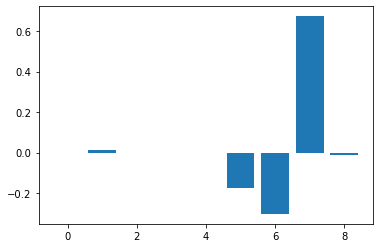

In [3145]:
import matplotlib.pyplot as plt

# Assuming input_data contains your features
feature_names = X.columns

# Get importance
importance = model.coef_

# Plot feature importance

for i, v in enumerate(importance):
    print(f"Feature: {feature_names[i]}, Score: {v:.5f}")

plt.bar([x for x in range(len(importance))], importance)
plt.show()